In [1]:
!pip install datasets

In [7]:
import pandas as pd

# jigsaw-toxic-comment-classification

In [3]:
from datasets import load_dataset

train = load_dataset("thesofakillers/jigsaw-toxic-comment-classification-challenge", split="train")
test  = load_dataset("thesofakillers/jigsaw-toxic-comment-classification-challenge", split="test")

In [6]:
print(train.column_names)

['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [5]:
print(train[0])

{'id': '0000997932d777bf', 'comment_text': "Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27", 'toxic': 0, 'severe_toxic': 0, 'obscene': 0, 'threat': 0, 'insult': 0, 'identity_hate': 0}


<Axes: xlabel='toxic'>

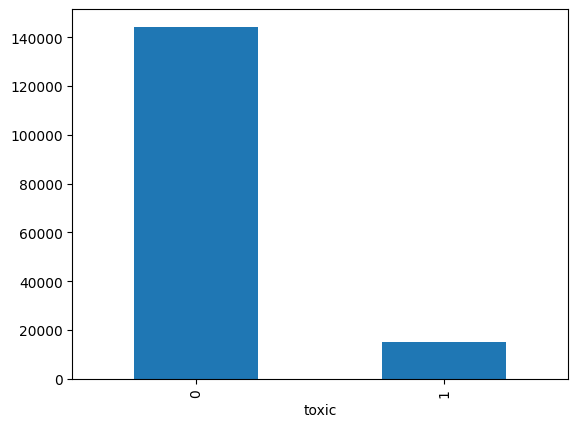

In [8]:
df = pd.DataFrame(train)
df.head()
df["toxic"].value_counts().plot(kind="bar")

In [10]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [14]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df[classes].groupby(classes).count()

Empty DataFrame
Columns: []
Index: [(0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 1, 0), (0, 0, 0, 0, 1, 1), (0, 0, 0, 1, 0, 0), (0, 0, 0, 1, 1, 0), (0, 0, 1, 0, 0, 0), (0, 0, 1, 0, 0, 1), (0, 0, 1, 0, 1, 0), (0, 0, 1, 0, 1, 1), (0, 0, 1, 1, 0, 0), (0, 0, 1, 1, 1, 0), (1, 0, 0, 0, 0, 0), (1, 0, 0, 0, 0, 1), (1, 0, 0, 0, 1, 0), (1, 0, 0, 0, 1, 1), (1, 0, 0, 1, 0, 0), (1, 0, 0, 1, 0, 1), (1, 0, 0, 1, 1, 0), (1, 0, 0, 1, 1, 1), (1, 0, 1, 0, 0, 0), (1, 0, 1, 0, 0, 1), (1, 0, 1, 0, 1, 0), (1, 0, 1, 0, 1, 1), (1, 0, 1, 1, 0, 0), (1, 0, 1, 1, 1, 0), (1, 0, 1, 1, 1, 1), (1, 1, 0, 0, 0, 0), (1, 1, 0, 0, 0, 1), (1, 1, 0, 0, 1, 0), (1, 1, 0, 0, 1, 1), (1, 1, 0, 1, 0, 0), (1, 1, 0, 1, 0, 1), (1, 1, 0, 1, 1, 0), (1, 1, 1, 0, 0, 0), (1, 1, 1, 0, 0, 1), (1, 1, 1, 0, 1, 0), (1, 1, 1, 0, 1, 1), (1, 1, 1, 1, 0, 0), (1, 1, 1, 1, 1, 0), (1, 1, 1, 1, 1, 1)]

In [ ]:
# okay, so toxic is the or of all the other tags

In [19]:
df = df[['comment_text','toxic']].copy()

In [20]:
df['comment_length'] = df['comment_text'].apply(lambda x: len(x))

In [45]:
df["nonascii_n"] = df["comment_text"].str.count(r"[^\x00-\x7F]")
df["num_n"] = df["comment_text"].str.count(r"\d")
df["special_n"] = df["comment_text"].str.count(r"[^A-Za-z]")
df['one'] = 1

In [46]:
df.describe()

,toxic,comment_length,nonascii_n,num_n,special_n,one
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.0
mean,0.095844,394.073221,0.412237,3.302806,88.987855,1.0
std,0.294379,590.720282,5.142814,16.984999,135.275841,0.0
min,0.000000,6.000000,0.000000,0.000000,1.000000,1.0
25%,0.000000,96.000000,0.000000,0.000000,23.000000,1.0
50%,0.000000,205.000000,0.000000,0.000000,48.000000,1.0
75%,0.000000,435.000000,0.000000,2.000000,98.000000,1.0
max,1.000000,5000.000000,1062.000000,4246.000000,4948.000000,1.0


In [52]:
import plotly.express as px
from plotly.subplots import make_subplots

In [64]:
def check_col(df, col):
    fig = make_subplots(
        rows=2,
        cols=2,
    )

    df_temp = df.groupby(
        [col]
    ).count(
    ).reset_index(
    )[
        [col, 'one']
    ].rename(
        columns={'one':'count'}
    ).sort_values(
        by=[col]
    )
    df_temp['cdf'] = df_temp['count'].cumsum() / df_temp['count'].sum()
    df_temp['pdf'] = df_temp['count'] / df_temp['count'].sum()


    fig.add_trace(
        px.line(df_temp, x=col, y='cdf').data[0],
        row=1, col=1
    )
    fig.add_trace(
        px.line(df_temp, x=col, y='pdf').data[0],
        row=2, col=1
    )
    # px.line(df_temp, x='comment_length', y='cdf')
    # px.line(df_temp, x='comment_length', y='pdf')

    df_temp = (
        df.groupby(['toxic', col])
        .size()
        .reset_index(name='count')
        .sort_values(['toxic', col])
    )

    df_temp['pdf'] = df_temp['count'] / df_temp.groupby('toxic')['count'].transform('sum')
    df_temp['cdf'] = df_temp.groupby('toxic')['count'].cumsum() / df_temp.groupby('toxic')['count'].transform('sum')

    # px.line(df_temp, x='comment_length', y='cdf', color='toxic')
    # px.line(df_temp, x='comment_length', y='pdf', color='toxic')

    fig_px = px.line(df_temp, x=col, y='cdf', color='toxic')
    for trace in fig_px.data:
        fig.add_trace(trace, row=1, col=2)

    fig_px = px.line(df_temp, x=col, y='pdf', color='toxic')
    for trace in fig_px.data:
        fig.add_trace(trace, row=2, col=2)

    fig.update_layout(
        height=700,
        width=900,
        showlegend=True,
        title_text=col
    )

    fig.show()

In [67]:
check_col(df, 'comment_length')

In [68]:
check_col(df, 'nonascii_n')

In [69]:
check_col(df, 'num_n')

In [70]:
check_col(df, 'special_n')

In [71]:
df.query(''' comment_length == 5000 ''')

,comment_text,toxic,comment_length,nonascii_n,num_n,special_n,one
4174,ii CAN STILL POST WITH THIS COMPUTER...I SAID ...,1,5000,0,0,1073,1
6201,SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SE...,1,5000,0,0,454,1
8705,BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALL...,1,5000,0,0,833,1
9673,"FUCK YOU, YOU ATHEIST CUNT! FUCK YOU, YOU ATHE...",1,5000,0,0,1250,1
10769,TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TO...,1,5000,0,909,1817,1
12895,I OWN THIS PAGE YOU FOOLS!! YOU SHOULD FEAR ME...,1,5000,0,0,1625,1
16643,'''Hi Wikipedia!!Hi Wikipedia!!Hi Wikipedia!!H...,0,5000,0,0,1073,1
18183,Hey guys I love chicken rice=)Hey guys I love ...,0,5000,0,0,1166,1
22378,I fuck niggas! I fuck niggas! I fuck niggas! I...,1,5000,0,0,1333,1
25702,"""....would you prefer expressing my frustratio...",0,5000,0,6,1133,1


okay, so there is some disparity between the classes, this is a bit concerning

The most concerning thing is the length - toxic messages are visibly shorter - 77.6% of toxic messages are shorter than 300 chars, 61.7% of non-toxic ones.

There is also a noticeable peak around hte end of the spectrum for toxic messages - inspection shows that it is mostly obscenity and repetition.

Although this disparity pretty much evaporates at 1500 chars (2 p.p. diff), so we can get away with trimming them up to 1500 if we need to.